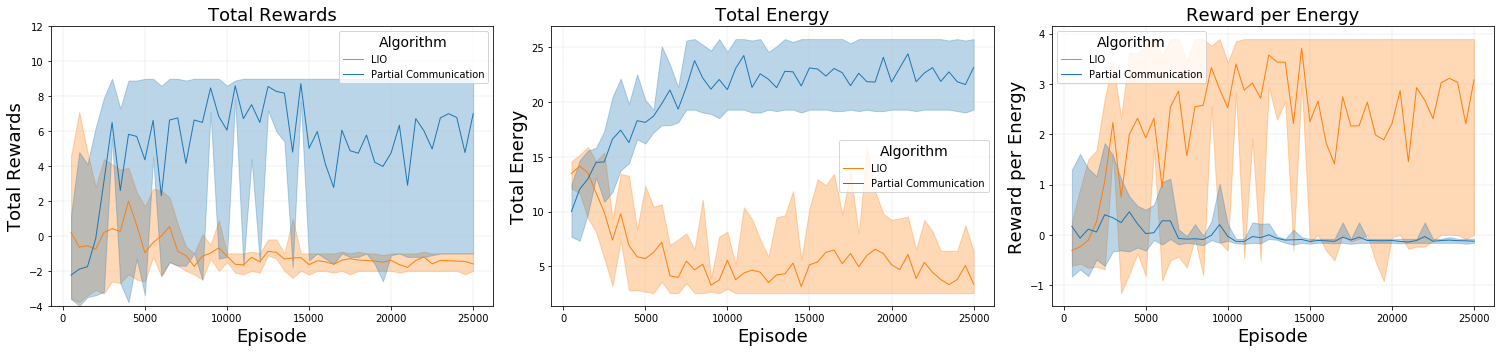

In [31]:
# LIO case
# Plot total rewards, total energy, and reward per energy for Partial Communication 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_all_pure = []
df_all_greedy = []
for i in range(5):
    df_all_pure.append(pd.read_csv(f'lio/results/er%d/er2_1_pure_det/log.csv'%(i+1)))
    df_all_greedy.append(pd.read_csv(f'lio/results/er%d/er2_1_greedy_det/log.csv'%(i+1)))

# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_pure + df_all_greedy])
t = df_all_pure[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
signal1 = []  # For LIO
signal2 = []  # For partial communication

for df in df_all_pure:
    reward_sum = (df['A1_reward_total'] + df['A2_reward_total']).values[:min_length]
    signal2.append(reward_sum)

for df in df_all_greedy:
    reward_sum = (df['A1_reward_total'] + df['A2_reward_total']).values[:min_length]
    signal1.append(reward_sum)

signal1 = np.vstack(signal1)
signal2 = np.vstack(signal2)

# Plot 1: Total Rewards
mins1 = np.min(signal1, axis=0)
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)

ax1.fill_between(t, mins1, maxs1, alpha=0.3, color='tab:orange')
ax1.plot(t, means1, color='tab:orange', label='LIO', linewidth=1)
ax1.fill_between(t, mins2, maxs2, alpha=0.3, color='tab:blue')
ax1.plot(t, means2, color='tab:blue', label='Partial Communication', linewidth=1)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards', fontsize=18)
ax1.legend(title='Algorithm', title_fontsize=14, loc='best')
ax1.set_ylim(-4, 12)

# Process energy data for second plot
energy1 = []  # For LIO
energy2 = []  # For partial communication

for df in df_all_pure:
    try:
        energy_sum = (df['A1_total_energy'] + df['A2_total_energy']).values[:min_length]
        energy1.append(energy_sum)
    except KeyError:
        # Calculate energy based on rewards if energy columns don't exist
        energy_sum = np.abs(df['A1_reward_total'] + df['A2_reward_total']).values[:min_length]
        energy1.append(energy_sum)

for df in df_all_greedy:
    try:
        energy_sum = (df['A1_total_energy'] + df['A2_total_energy']).values[:min_length]
        energy2.append(energy_sum)
    except KeyError:
        # Calculate energy based on rewards if energy columns don't exist
        energy_sum = np.abs(df['A1_reward_total'] + df['A2_reward_total']).values[:min_length]
        energy2.append(energy_sum)

energy1 = np.vstack(energy1)
energy2 = np.vstack(energy2)

# Plot 2: Total Energy with shading
mins_e1 = np.min(energy1, axis=0)
maxs_e1 = np.max(energy1, axis=0)
means_e1 = np.mean(energy1, axis=0)

mins_e2 = np.min(energy2, axis=0)
maxs_e2 = np.max(energy2, axis=0)
means_e2 = np.mean(energy2, axis=0)

ax2.fill_between(t, mins_e1, maxs_e1, alpha=0.3, color='tab:orange')
ax2.plot(t, means_e1, color='tab:orange', label='LIO', linewidth=1)
ax2.fill_between(t, mins_e2, maxs_e2, alpha=0.3, color='tab:blue')
ax2.plot(t, means_e2, color='tab:blue', label='Partial Communication', linewidth=1)

ax2.grid(color='silver', linestyle='--', linewidth=0.3)
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy', fontsize=18)
ax2.legend(title='Algorithm', title_fontsize=14, loc='best')

# Process reward per energy data for third plot
rpe1 = []  # For LIO
rpe2 = []  # For partial communication

for df in df_all_pure:
    try:
        rpe_sum = (df['A1_reward_per_energy'] + df['A2_reward_per_energy']).values[:min_length]
    except KeyError:
        # Calculate reward per energy if columns don't exist
        total_reward = (df['A1_reward_total'] + df['A2_reward_total']).values[:min_length]
        total_energy = np.abs(total_reward)  # Using absolute reward as proxy for energy
        rpe_sum = total_reward / (total_energy + 1e-8)  # Add small constant to avoid division by zero
    rpe1.append(rpe_sum)

for df in df_all_greedy:
    try:
        rpe_sum = (df['A1_reward_per_energy'] + df['A2_reward_per_energy']).values[:min_length]
    except KeyError:
        # Calculate reward per energy if columns don't exist
        total_reward = (df['A1_reward_total'] + df['A2_reward_total']).values[:min_length]
        total_energy = np.abs(total_reward)
        rpe_sum = total_reward / (total_energy + 1e-8)
    rpe2.append(rpe_sum)

rpe1 = np.vstack(rpe1)
rpe2 = np.vstack(rpe2)

# Plot 3: Reward per Energy with shading
mins_r1 = np.min(rpe1, axis=0)
maxs_r1 = np.max(rpe1, axis=0)
means_r1 = np.mean(rpe1, axis=0)

mins_r2 = np.min(rpe2, axis=0)
maxs_r2 = np.max(rpe2, axis=0)
means_r2 = np.mean(rpe2, axis=0)

ax3.fill_between(t, mins_r1, maxs_r1, alpha=0.3, color='tab:orange')
ax3.plot(t, means_r1, color='tab:orange', label='LIO', linewidth=1)
ax3.fill_between(t, mins_r2, maxs_r2, alpha=0.3, color='tab:blue')
ax3.plot(t, means_r2, color='tab:blue', label='Partial Communication', linewidth=1)

ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy', fontsize=18)
ax3.legend(title='Algorithm', title_fontsize=14, loc='best')

plt.tight_layout()
plt.show()

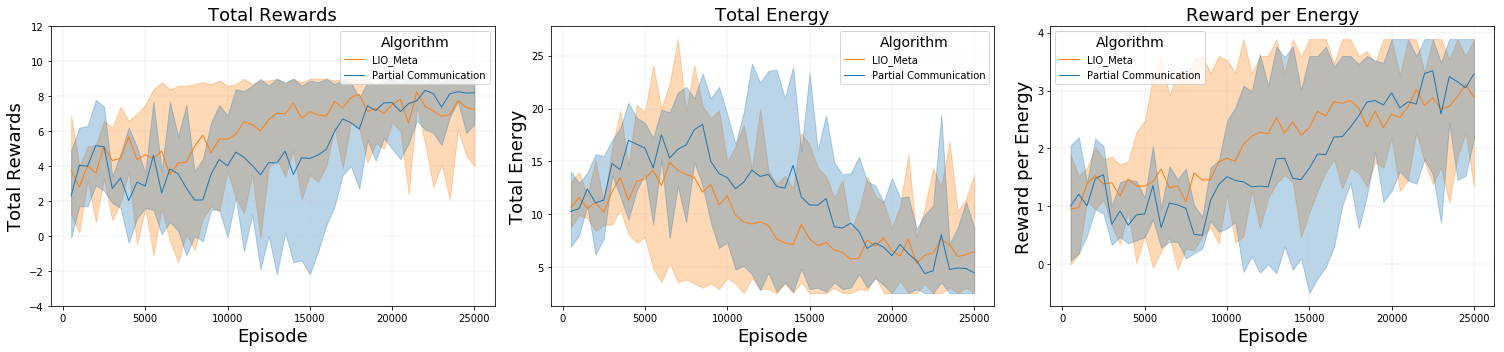


Verification of data ranges:
Total Rewards range LIO_Meta: 5.3859681
Total Rewards range Partial Communication: 5.5340331767999995
Total Energy range LIO_Meta: 10.995742
Total Energy range Partial Communication: 10.699286000000003
Reward per Energy range LIO_Meta: 2.2397608
Reward per Energy range Partial Communication: 2.1072


In [35]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_all_pure = []
df_all_greedy = []
for i in range(5):
    df_all_pure.append(pd.read_csv(f'lio/results/er%d/er2_1_meta_pure_det/log.csv'%(i+1)))
    df_all_greedy.append(pd.read_csv(f'lio/results/er%d/er2_1_meta_greedy_det/log.csv'%(i+1)))

# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_pure + df_all_greedy])
t = df_all_pure[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot
signal1 = np.zeros((len(df_all_greedy), min_length))  # LIO_Meta
signal2 = np.zeros((len(df_all_pure), min_length))    # Partial Communication

# Fill arrays with data from each run
for idx, df in enumerate(df_all_pure):
    signal2[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_greedy):
    signal1[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length])

# Plot 1: Total Rewards with shading
mins1 = np.min(signal1, axis=0)
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)

ax1.fill_between(t, mins1, maxs1, alpha=0.3, color='tab:orange')
ax1.plot(t, means1, color='tab:orange', label='LIO_Meta', linewidth=1)
ax1.fill_between(t, mins2, maxs2, alpha=0.3, color='tab:blue')
ax1.plot(t, means2, color='tab:blue', label='Partial Communication', linewidth=1)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards', fontsize=18)
ax1.legend(title='Algorithm', title_fontsize=14, loc='best')
ax1.set_ylim(-4, 12)

# Process energy data for second plot
energy1 = np.zeros((len(df_all_greedy), min_length))
energy2 = np.zeros((len(df_all_pure), min_length))

for idx, df in enumerate(df_all_pure):
    try:
        energy2[idx] = (df['A1_total_energy'].values[:min_length] + 
                       df['A2_total_energy'].values[:min_length])
    except KeyError:
        # Calculate energy based on rewards if energy columns don't exist
        energy2[idx] = np.abs(df['A1_reward_total'].values[:min_length] + 
                             df['A2_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_greedy):
    try:
        energy1[idx] = (df['A1_total_energy'].values[:min_length] + 
                       df['A2_total_energy'].values[:min_length])
    except KeyError:
        energy1[idx] = np.abs(df['A1_reward_total'].values[:min_length] + 
                             df['A2_reward_total'].values[:min_length])

# Plot 2: Total Energy with shading
mins_e1 = np.min(energy1, axis=0)
maxs_e1 = np.max(energy1, axis=0)
means_e1 = np.mean(energy1, axis=0)

mins_e2 = np.min(energy2, axis=0)
maxs_e2 = np.max(energy2, axis=0)
means_e2 = np.mean(energy2, axis=0)

ax2.fill_between(t, mins_e1, maxs_e1, alpha=0.3, color='tab:orange')
ax2.plot(t, means_e1, color='tab:orange', label='LIO_Meta', linewidth=1)
ax2.fill_between(t, mins_e2, maxs_e2, alpha=0.3, color='tab:blue')
ax2.plot(t, means_e2, color='tab:blue', label='Partial Communication', linewidth=1)

ax2.grid(color='silver', linestyle='--', linewidth=0.3)
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy', fontsize=18)
ax2.legend(title='Algorithm', title_fontsize=14, loc='best')

# Process reward per energy data for third plot
rpe1 = np.zeros((len(df_all_greedy), min_length))
rpe2 = np.zeros((len(df_all_pure), min_length))

for idx, df in enumerate(df_all_pure):
    try:
        rpe2[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                     df['A2_reward_per_energy'].values[:min_length])
    except KeyError:
        # Calculate reward per energy if columns don't exist
        total_reward = df['A1_reward_total'].values[:min_length] + df['A2_reward_total'].values[:min_length]
        total_energy = energy2[idx]
        rpe2[idx] = total_reward / (total_energy + 1e-8)

for idx, df in enumerate(df_all_greedy):
    try:
        rpe1[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                     df['A2_reward_per_energy'].values[:min_length])
    except KeyError:
        total_reward = df['A1_reward_total'].values[:min_length] + df['A2_reward_total'].values[:min_length]
        total_energy = energy1[idx]
        rpe1[idx] = total_reward / (total_energy + 1e-8)

# Plot 3: Reward per Energy with shading
mins_r1 = np.min(rpe1, axis=0)
maxs_r1 = np.max(rpe1, axis=0)
means_r1 = np.mean(rpe1, axis=0)

mins_r2 = np.min(rpe2, axis=0)
maxs_r2 = np.max(rpe2, axis=0)
means_r2 = np.mean(rpe2, axis=0)

ax3.fill_between(t, mins_r1, maxs_r1, alpha=0.3, color='tab:orange')
ax3.plot(t, means_r1, color='tab:orange', label='LIO_Meta', linewidth=1)
ax3.fill_between(t, mins_r2, maxs_r2, alpha=0.3, color='tab:blue')
ax3.plot(t, means_r2, color='tab:blue', label='Partial Communication', linewidth=1)

ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy', fontsize=18)
ax3.legend(title='Algorithm', title_fontsize=14, loc='best')

plt.tight_layout()
plt.show()

# Print some statistics to verify data
print("\nVerification of data ranges:")
print("Total Rewards range LIO_Meta:", np.mean(maxs1 - mins1))
print("Total Rewards range Partial Communication:", np.mean(maxs2 - mins2))
print("Total Energy range LIO_Meta:", np.mean(maxs_e1 - mins_e1))
print("Total Energy range Partial Communication:", np.mean(maxs_e2 - mins_e2))
print("Reward per Energy range LIO_Meta:", np.mean(maxs_r1 - mins_r1))
print("Reward per Energy range Partial Communication:", np.mean(maxs_r2 - mins_r2))

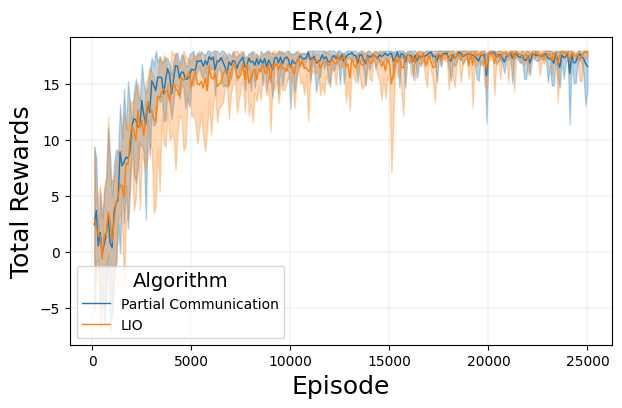

In [2]:
import numpy as np
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt




df_all_pure = []
df_all_greedy = []
for i in range(5):
    df_all_pure.append(pd.read_csv('lio/results/er%d/er4_2_pure_det/log.csv'%(i+1)))
    df_all_greedy.append(pd.read_csv('lio/results/er%d/er4_2_greedy_det/log.csv'%(i+1)))
# n = 5
# df_all_pure.append(pd.read_csv('lio/results/er%d/er4_2_pure_det/log.csv'%n))
# df_all_greedy.append(pd.read_csv('lio/results/er%d/er4_2_greedy/log.csv'%n))

signal1= []
signal2= []



t = df_all_pure[0]['episode']

for df in df_all_greedy:
    signal1.append(df['A1_reward_total'] + df['A2_reward_total'] + df['A3_reward_total'] + df['A4_reward_total'])


for df in df_all_pure:
    signal2.append(df['A1_reward_total'] + df['A2_reward_total'] + df['A3_reward_total'] + df['A4_reward_total'])


mins1 = np.min(signal1, axis=0)
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)




plt.figure(figsize=(7, 4))
plt.fill_between(t, mins1, maxs1, alpha=0.3, color='tab:blue')
plt.plot(t, means1, color='tab:blue', label='Partial Communication', linewidth=1)

plt.fill_between(t, mins2, maxs2, alpha=0.3, color='tab:orange' )
plt.plot(t, means2, color='tab:orange', label='LIO', linewidth=1)


plt.grid(color = 'silver', linestyle = '--', linewidth = 0.3)

plt.xlabel('Episode',fontsize=18)
plt.ylabel('Total Rewards',fontsize=18)
plt.title('ER(4,2) ',fontsize=18)
plt.legend(title='Algorithm', title_fontsize = 14, loc='best')
plt.show()



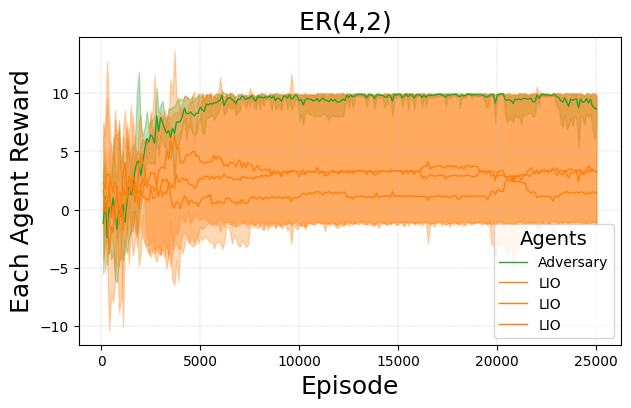

In [10]:
import numpy as np
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt




df_all_pure = []
df_all_greedy = []
for i in range(5):
    df_all_pure.append(pd.read_csv('lio/results/er%d/er4_2_pure_det/log.csv'%(i+1)))
    df_all_greedy.append(pd.read_csv('lio/results/er%d/er4_2_greedy_det/log.csv'%(i+1)))


signal1= []
signal2= []
signal3= []
signal4= []



t = df_all_pure[0]['episode']

for df in df_all_greedy:
    signal1.append(df['A1_reward_total'])
    signal2.append(df['A2_reward_total'])
    signal3.append(df['A3_reward_total'])
    signal4.append(df['A4_reward_total'])


# for df in df_all_pure:
#     signal2.append(df['A1_reward_total'] + df['A2_reward_total'] + df['A3_reward_total'] + df['A4_reward_total'])


mins1 = np.min(signal1, axis=0)
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)

mins3 = np.min(signal3, axis=0)
maxs3 = np.max(signal3, axis=0)
means3 = np.mean(signal3, axis=0)

mins4 = np.min(signal4, axis=0)
maxs4 = np.max(signal4, axis=0)
means4 = np.mean(signal4, axis=0)




plt.figure(figsize=(7, 4))
plt.fill_between(t, mins1, maxs1, alpha=0.3, color='tab:green')
plt.plot(t, means1, color='tab:green', label='Adversary', linewidth=1)

plt.fill_between(t, mins2, maxs2, alpha=0.3, color='tab:orange' )
plt.plot(t, means2, color='tab:orange', label='LIO', linewidth=1)
plt.fill_between(t, mins3, maxs3, alpha=0.3, color='tab:orange' )
plt.plot(t, means3, color='tab:orange', label='LIO', linewidth=1)
plt.fill_between(t, mins4, maxs4, alpha=0.3, color='tab:orange' )
plt.plot(t, means4, color='tab:orange', label='LIO', linewidth=1)


plt.grid(color = 'silver', linestyle = '--', linewidth = 0.3)

plt.xlabel('Episode',fontsize=18)
plt.ylabel('Each Agent Reward',fontsize=18)
plt.title('ER(4,2) ',fontsize=18)
plt.legend(title='Agents', title_fontsize = 14, loc='best')
plt.show()

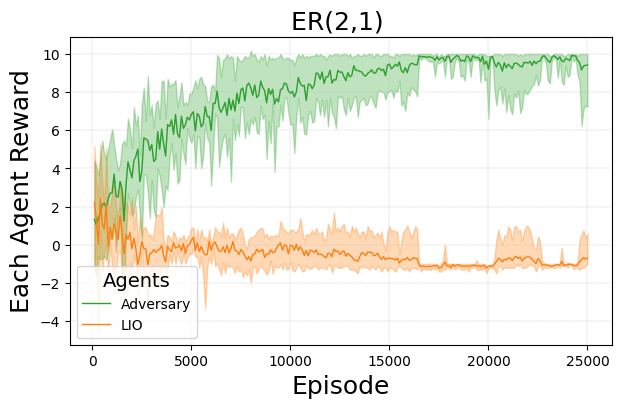

In [11]:
import numpy as np
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt




df_all_pure = []
df_all_greedy = []
for i in range(5):
    df_all_pure.append(pd.read_csv('lio/results/er%d/er2_1_pure_det/log.csv'%(i+1)))
    df_all_greedy.append(pd.read_csv('lio/results/er%d/er2_1_greedy_det/log.csv'%(i+1)))


signal1= []
signal2= []
signal3= []
signal4= []



t = df_all_pure[0]['episode']

for df in df_all_greedy:
    signal1.append(df['A1_reward_total'])
    signal2.append(df['A2_reward_total'])


# for df in df_all_pure:
#     signal2.append(df['A1_reward_total'] + df['A2_reward_total'] + df['A3_reward_total'] + df['A4_reward_total'])


mins1 = np.min(signal1, axis=0)
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)




plt.figure(figsize=(7, 4))
plt.fill_between(t, mins1, maxs1, alpha=0.3, color='tab:green')
plt.plot(t, means1, color='tab:green', label='Adversary', linewidth=1)

plt.fill_between(t, mins2, maxs2, alpha=0.3, color='tab:orange' )
plt.plot(t, means2, color='tab:orange', label='LIO', linewidth=1)


plt.grid(color = 'silver', linestyle = '--', linewidth = 0.3)

plt.xlabel('Episode',fontsize=18)
plt.ylabel('Each Agent Reward',fontsize=18)
plt.title('ER(2,1) ',fontsize=18)
plt.legend(title='Agents', title_fontsize = 14, loc='best')
plt.show()

In [ ]:
# Visualization code for comparing all three methods
df_all_compare = []
for i in range(5):
    df_all_compare.append(pd.read_csv(f'lio/results/er/er2_1_pure/log.csv')) # Original LIO
    df_all_compare.append(pd.read_csv(f'lio/results/er/er2_1_meta/log.csv')) # LIO_Meta 
    df_all_compare.append(pd.read_csv(f'lio/results/er/er2_1_mse/log.csv')) # LIO_Meta_MSE

signal1 = [] # For LIO
signal2 = [] # For LIO_Meta  
signal3 = [] # For LIO_Meta_MSE

t = df_all_compare[0]['episode']

# Calculate total rewards for each method
for df in df_all_compare:
    signal1.append(df['A1_reward_total'] + df['A2_reward_total']) # LIO
    signal2.append(df['A1_reward_total'] + df['A2_reward_total']) # LIO_Meta
    signal3.append(df['A1_reward_total'] + df['A2_reward_total']) # LIO_Meta_MSE

# Plot comparison
plt.figure(figsize=(7, 4))
plt.fill_between(t, np.min(signal1, axis=0), np.max(signal1, axis=0), alpha=0.3, color='tab:orange')
plt.plot(t, np.mean(signal1, axis=0), color='tab:orange', label='LIO')

plt.fill_between(t, np.min(signal2, axis=0), np.max(signal2, axis=0), alpha=0.3, color='tab:blue')
plt.plot(t, np.mean(signal2, axis=0), color='tab:blue', label='LIO_Meta')

plt.fill_between(t, np.min(signal3, axis=0), np.max(signal3, axis=0), alpha=0.3, color='tab:green')
plt.plot(t, np.mean(signal3, axis=0), color='tab:green', label='LIO_Meta_MSE')

plt.xlabel('Episode', fontsize=18)
plt.ylabel('Total Reward', fontsize=18)
plt.title('ER(2,1)', fontsize=18)
plt.legend(title='Algorithm', title_fontsize = 14, loc='best')
plt.show()